# Population Data from CSV

This notebooks reads sample population data from `data/atlantis.csv` and plots it using Matplotlib. Edit `data/atlantis.csv` and re-run this cell to see how the plots change!

In [12]:
import matplotlib.pyplot as plt
import pandas
import numpy as np 

S = 300 # velocità di pompaggio in lt/s
Q = 60  # flusso in sccm

def trova_lunghezza_sequenza(x_temp):
    n = len(x_temp)
    for i in range(1, n // 2 + 1):
        if np.array_equal(x_temp[:i], x_temp[i:2*i]):
            return i
    return n

df = pandas.read_csv('../data/griglia.csv', sep=';')
x_raw = np.array(df["f"] * S)
y_raw = np.array(df["g"] * Q)
z_raw = np.array(df["p"])
z1_raw = np.array(df["p1"])


In [71]:

# Definisci i limiti dell'intervallo desiderato
x_min, x_max = 150, 300
y_min, y_max = 30, 60

# Crea una maschera per selezionare i dati all'interno dell'intervallo desiderato
mask = (x_raw >= x_min) & (x_raw <= x_max) & (y_raw >= y_min) & (y_raw <= y_max)

In [72]:
x_temp = x_raw[mask]
y_temp = y_raw[mask]
z_temp = z_raw[mask]
z1_temp = z1_raw[mask]

In [73]:
y_shape = trova_lunghezza_sequenza(y_temp)
x_shape = len(z_temp) // y_shape

X = x_temp.reshape(x_shape, y_shape)
Y = y_temp.reshape(x_shape, y_shape)
Z = z_temp.reshape(x_shape, y_shape) * 1000
Z1 = z1_temp.reshape(x_shape, y_shape) * 1000


In [78]:
# Filtra i punti con Z = 4.5 (approssimativamente)
threshold = 0.1
target = 4.5
mask = np.abs(Z - target) < threshold
x_filtered_0 = X[mask]
y_filtered_0 = Y[mask]


# Esegui una regressione polinomiale di secondo grado
coefficients_0 = np.polyfit(x_filtered_0, y_filtered_0, 2)
polynomial_0 = np.poly1d(coefficients_0)    

# Stampa i coefficienti dell'equazione polinomiale
print("Coefficiente di secondo grado:", coefficients_0[0])
print("Coefficiente di primo grado:", coefficients_0[1])
print("Termine costante:", coefficients_0[2])

Coefficiente di secondo grado: 0.0002380952380952417
Coefficiente di primo grado: 0.16071428571428403
Termine costante: -0.3749999999998171


In [80]:
# Filtra i punti con Z = 4.5 (approssimativamente)
threshold = 0.15
target = 4.5
mask = np.abs(Z1 - target) < threshold
x_filtered_1 = X[mask]
y_filtered_1 = Y[mask]


# Esegui una regressione polinomiale di secondo grado
coefficients_1 = np.polyfit(x_filtered_1, y_filtered_1, 2)
polynomial_1 = np.poly1d(coefficients_1)

# Stampa i coefficienti dell'equazione polinomiale
print("Coefficiente di secondo grado:", coefficients_1[0])
print("Coefficiente di primo grado:", coefficients_1[1])
print("Termine costante:", coefficients_1[2])


Coefficiente di secondo grado: 0.00029079548185532083
Coefficiente di primo grado: 0.13857245854362019
Termine costante: 2.1748377793798417


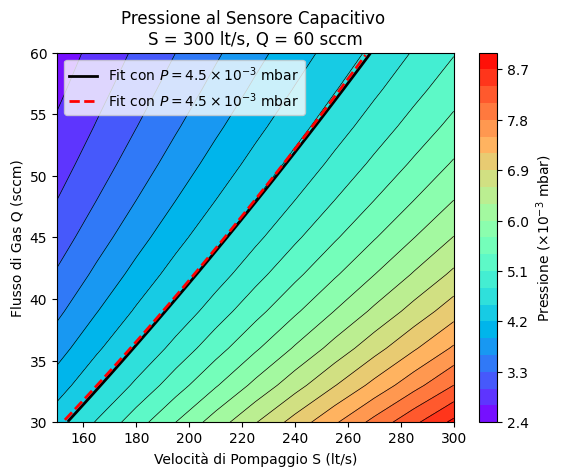

In [94]:
# Creazione del grafico di tipo contour plot con mappa di colori
contour_filled = plt.contourf(X, Y, Z, levels=20, cmap="rainbow")
contour_lines = plt.contour(X, Y, Z, levels=20, colors='black', linewidths=0.5)

# Aggiunta di etichette agli assi
plt.xlabel('Velocità di Pompaggio S (lt/s)')
plt.ylabel('Flusso di Gas Q (sccm)')

# Aggiunta di un titolo
plt.title('Pressione al Sensore Capacitivo \nS = 300 lt/s, Q = 60 sccm')

# Aggiunta di una barra dei colori
cbar = plt.colorbar(contour_filled)
cbar.set_label('Pressione ($\\times 10^{-3}$ mbar)')

# Traccia la curva polinomiale
x_fit = np.linspace(x_min, x_max, 100)
y_fit = polynomial_0(x_fit)
mask = (y_fit >= y_min) & (y_fit <= y_max)

plt.plot(x_fit[mask], y_fit[mask], 'k-', linewidth=2, label='Fit con $P = 4.5 \\times 10^{-3}$ mbar')


# Traccia la curva polinomiale
x_fit = np.linspace(x_min, x_max, 100)
y_fit = polynomial_1(x_fit)
mask = (y_fit >= y_min) & (y_fit <= y_max)

plt.plot(x_fit[mask], y_fit[mask], 'r--', linewidth=2, label='Fit con $P = 4.5 \\times 10^{-3}$ mbar')


# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.show()

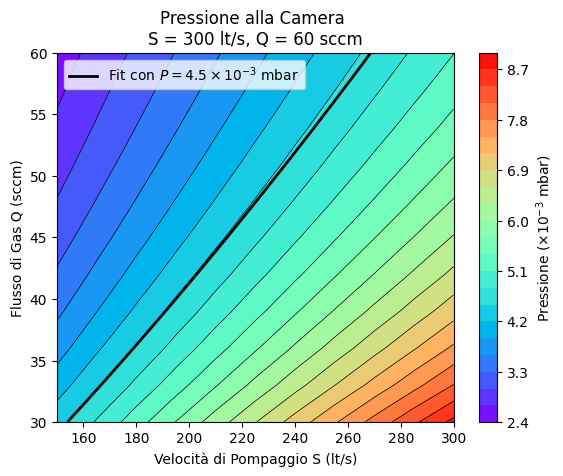

In [91]:
# Creazione del grafico di tipo contour plot con mappa di colori
contour_filled = plt.contourf(X, Y, Z1, levels=20, cmap="rainbow")
contour_lines = plt.contour(X, Y, Z1, levels=20, colors='black', linewidths=0.5)

# Aggiunta di etichette agli assi
plt.xlabel('Velocità di Pompaggio S (lt/s)')
plt.ylabel('Flusso di Gas Q (sccm)')

# Aggiunta di un titolo
plt.title('Pressione alla Camera \nS = 300 lt/s, Q = 60 sccm')

# Aggiunta di una barra dei colori
cbar = plt.colorbar(contour_filled)
cbar.set_label('Pressione ($\\times 10^{-3}$ mbar)')

# Traccia la curva polinomiale
x_fit = np.linspace(x_min, x_max, 100)
y_fit = polynomial_0(x_fit)
mask = (y_fit >= y_min) & (y_fit <= y_max)

plt.plot(x_fit[mask], y_fit[mask], 'k-', label='Fit con $P = 4.5 \\times 10^{-3}$ mbar', linewidth=2)


# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.show()